Columns found: ['feature1', 'feature2', 'label']


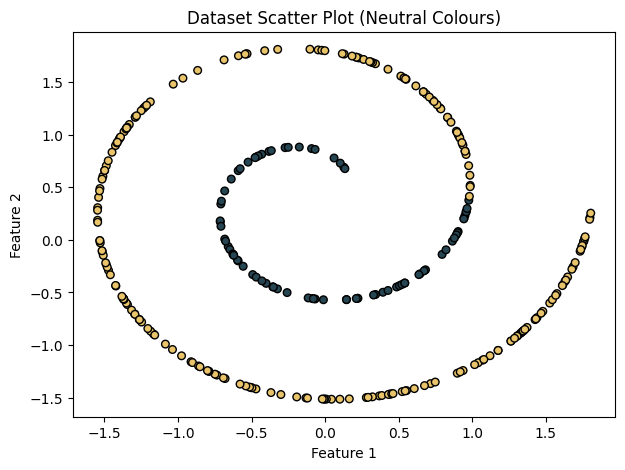

Naive Bayes Accuracy: 0.733


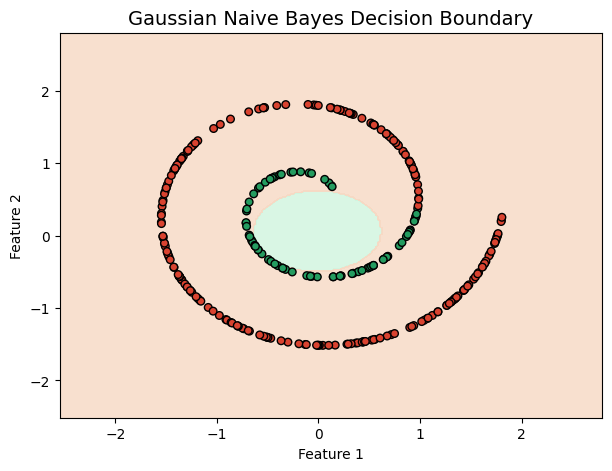

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


file_path = "spiral_multiclass_dataset.csv"

df = pd.read_csv(file_path)
print("Columns found:", df.columns.tolist())


feature_cols = ["feature1", "feature2"]
label_col = "label"

X = df[feature_cols].values
y = df[label_col].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


nb_cmap_light = ListedColormap(["#d0f4de", "#f7d9c4"])
nb_cmap_bold  = ListedColormap(["#249c60", "#d94330"])


def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=nb_cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=nb_cmap_bold,
                edgecolor="black", s=30)
    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plt.figure(figsize=(7,5))
neutral_map = ListedColormap(["#264653", "#e9c46a"])
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y,
            cmap=neutral_map, edgecolor='black', s=30)
plt.title("Dataset Scatter Plot (Neutral Colours)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


nb = GaussianNB()
nb.fit(X_train, y_train)

accuracy = nb.score(X_test, y_test)
print(f"Naive Bayes Accuracy: {accuracy:.3f}")


plot_decision_boundary(nb, X_scaled, y,
                       f"Gaussian Naive Bayes Decision Boundary")


# **GIT HUB**

https://github.com/Dumpalaakhil/Machine-Learning-Tutorial
